In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib


Bad key "text.kerning_factor" on line 4 in
/Users/luxuran/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [3]:
df_melb = pd.read_csv('melb_data.csv')
df_melb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
Suburb           13580 non-null object
Address          13580 non-null object
Rooms            13580 non-null int64
Type             13580 non-null object
Price            13580 non-null float64
Method           13580 non-null object
SellerG          13580 non-null object
Date             13580 non-null object
Distance         13580 non-null float64
Postcode         13580 non-null float64
Bedroom2         13580 non-null float64
Bathroom         13580 non-null float64
Car              13518 non-null float64
Landsize         13580 non-null float64
BuildingArea     7130 non-null float64
YearBuilt        8205 non-null float64
CouncilArea      12211 non-null object
Lattitude        13580 non-null float64
Longtitude       13580 non-null float64
Regionname       13580 non-null object
Propertycount    13580 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 2.2+ MB


In [4]:
df_melb

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


In [68]:
df_melb['Date'] = pd.to_datetime(df_melb['Date'])
df_melb['Landsize'].describe(())

/Users/luxuran/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


count     6196.000000
mean       471.006940
std        897.449881
min          0.000000
50%        373.000000
max      37000.000000
Name: Landsize, dtype: float64

In [6]:
df_melb.isnull().sum().sort_values(ascending=False)
df_melb = df_melb.dropna()#just for easy visualization

In [7]:
df_melb

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-04-02,2.5,3067.0,...,1.0,0.0,156.0,79.00,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-04-03,2.5,3067.0,...,2.0,0.0,134.0,150.00,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2016-04-06,2.5,3067.0,...,1.0,2.0,120.0,142.00,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
6,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,2016-07-05,2.5,3067.0,...,2.0,0.0,245.0,210.00,1910.0,Yarra,-37.80240,144.99930,Northern Metropolitan,4019.0
7,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,2016-08-10,2.5,3067.0,...,1.0,2.0,256.0,107.00,1890.0,Yarra,-37.80600,144.99540,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12205,Whittlesea,30 Sherwin St,3,h,601000.0,S,Ray,2017-07-29,35.5,3757.0,...,2.0,1.0,972.0,149.00,1996.0,Whittlesea,-37.51232,145.13282,Northern Victoria,2170.0
12206,Williamstown,75 Cecil St,3,h,1050000.0,VB,Williams,2017-07-29,6.8,3016.0,...,1.0,0.0,179.0,115.00,1890.0,Hobsons Bay,-37.86558,144.90474,Western Metropolitan,6380.0
12207,Williamstown,2/29 Dover Rd,1,u,385000.0,SP,Williams,2017-07-29,6.8,3016.0,...,1.0,1.0,0.0,35.64,1967.0,Hobsons Bay,-37.85588,144.89936,Western Metropolitan,6380.0
12209,Windsor,201/152 Peel St,2,u,560000.0,PI,hockingstuart,2017-07-29,4.6,3181.0,...,1.0,1.0,0.0,61.60,2012.0,Stonnington,-37.85581,144.99025,Southern Metropolitan,4380.0


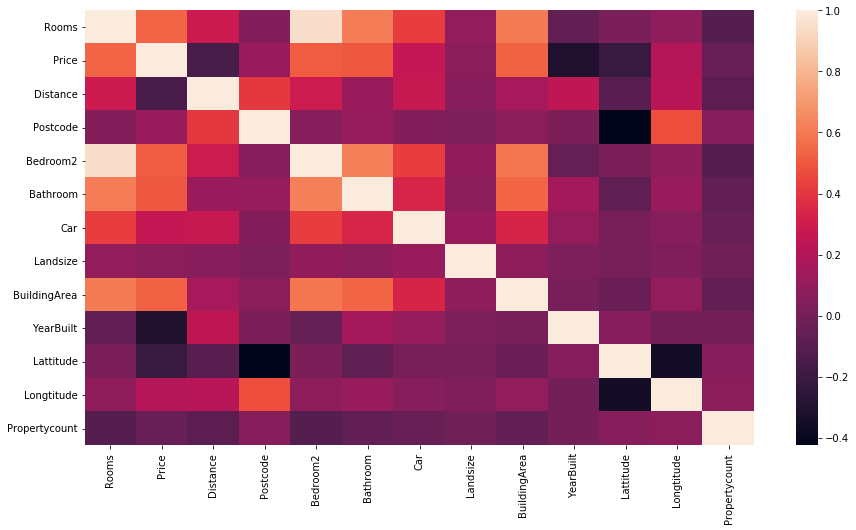

In [8]:
plt.rcParams["figure.figsize"]=15,8
sns.heatmap(df_melb.corr())

In [9]:
def Distribution(x_axis):#Differences in the number of housing trades
    plt.rcParams["figure.figsize"]=15,8 
    x_axis.sort_values() 
    xx = x_axis.unique() 
    yy = x_axis.value_counts()

    #print(xx)
    #print(yy)
    plt.bar(xx, yy, width=0.3, facecolor='#9999ff')
    a=np.arange(len(xx))
    for a,b in zip(a, yy):
        plt.text(a, b, '%.0f'%b, ha='center', va='bottom', fontsize=14)
    plt.xticks(xx,fontsize=8)
    plt.yticks(yy,fontsize=12)
    plt.title('Distribution by %s'%x_axis.name)
    plt.show()

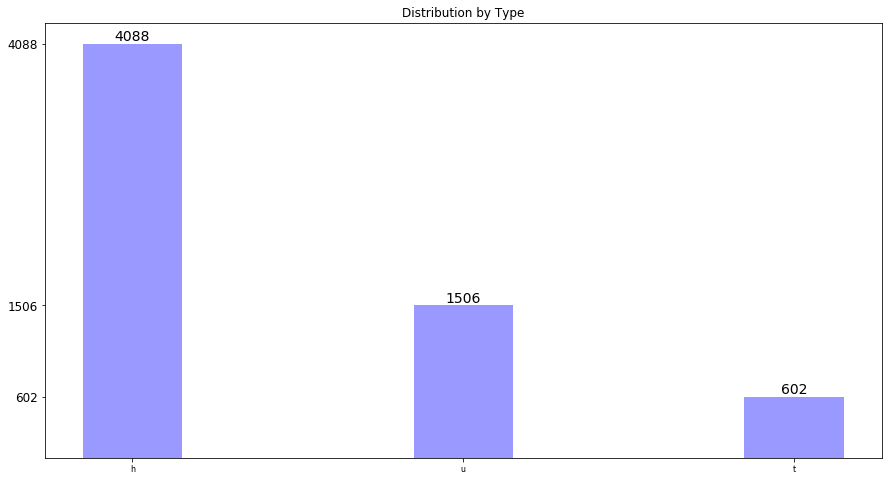

In [10]:
Distribution(df_melb['Type'])

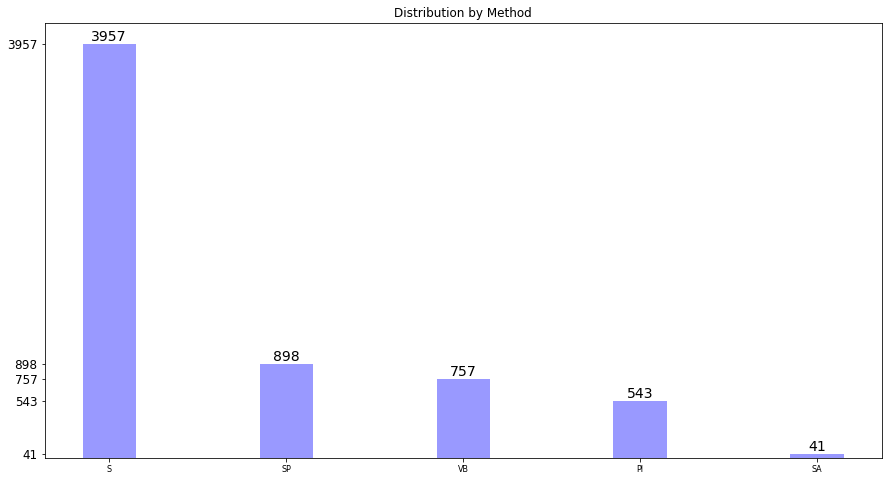

In [11]:
Distribution(df_melb['Method'])

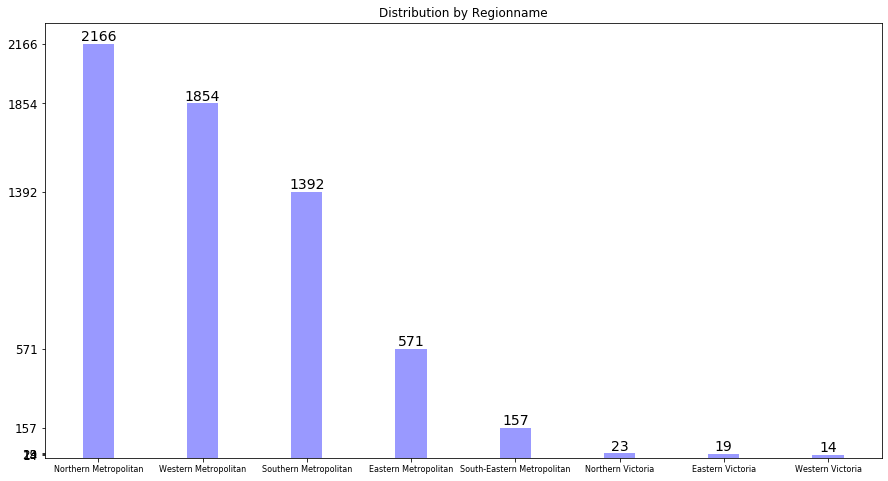

In [12]:
Distribution(df_melb['Regionname'])

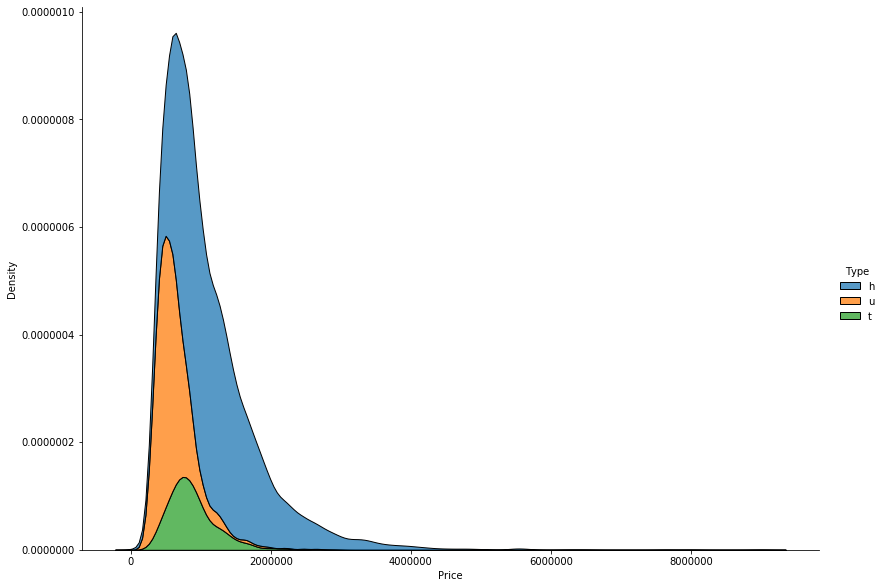

In [21]:
sns.displot(x="Price", data=df_melb, hue="Type", kind="kde", multiple="stack",height=8.27, aspect=11.7/8.27)#tried some seaborn

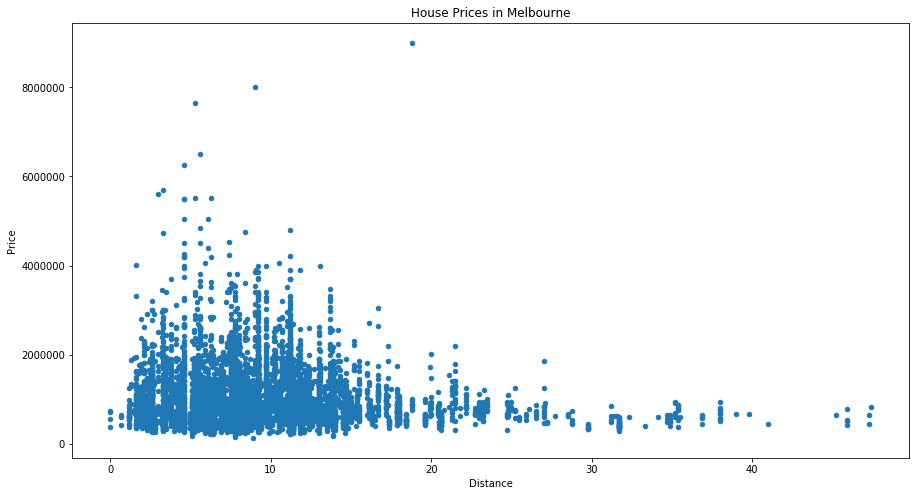

In [23]:
df_melb.plot(x='Distance', y='Price', kind='scatter',title='House Prices in Melbourne')#tried to plot with pandas directly

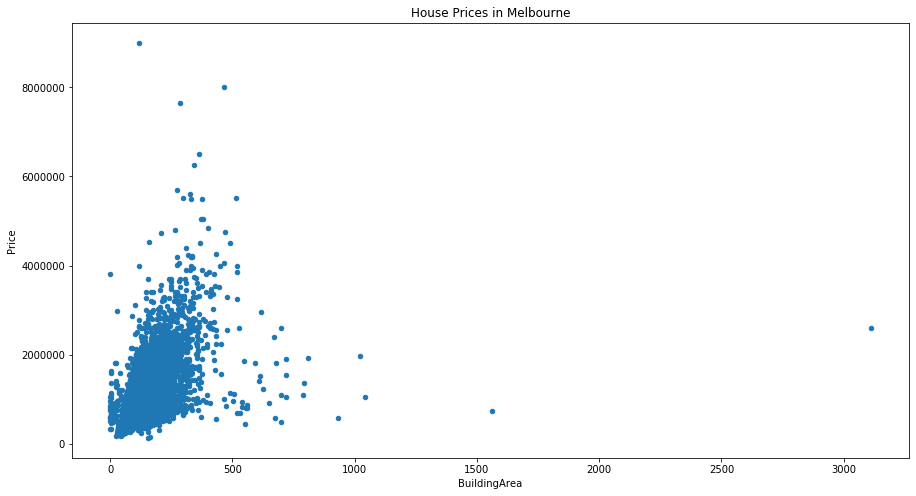

In [28]:
df_melb.plot(x='BuildingArea', y='Price', kind='scatter',title='House Prices in Melbourne')

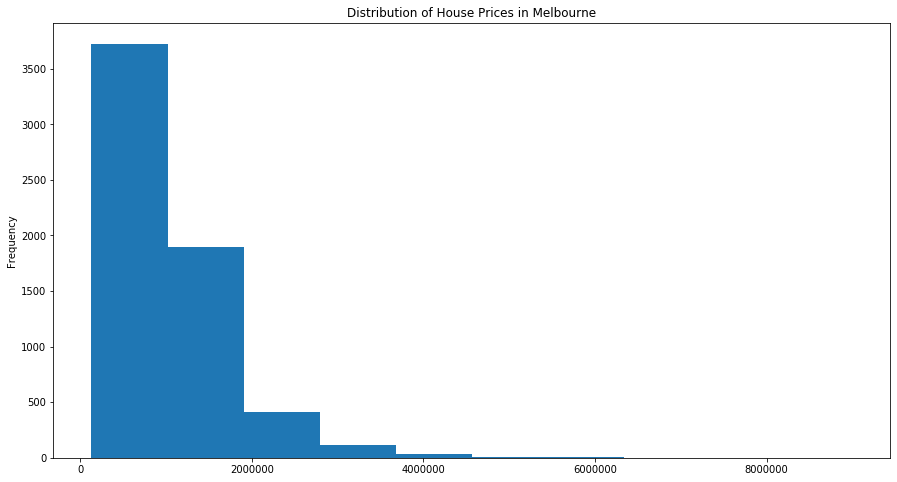

In [66]:
df_melb['Price'].plot(kind='hist',title='Distribution of House Prices in Melbourne')


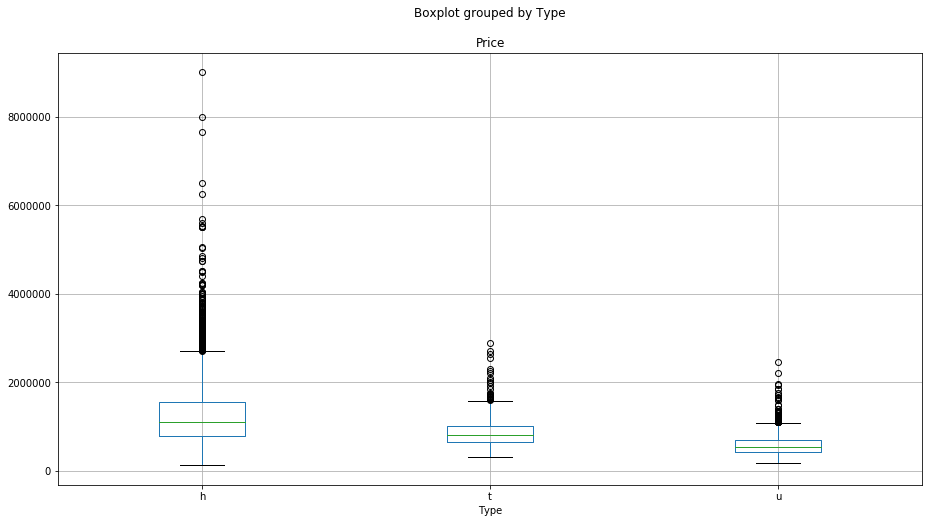

In [27]:
df_melb.boxplot(column='Price', by='Type')

In [72]:
def avg_price_bar(x):

    avg_price = df_melb[[x,'Price']].groupby(x).mean().sort_values(by='Price', ascending=False)
    print(avg_price)
    plt.bar(avg_price.index,avg_price['Price'],facecolor='#9999ff')
    a=np.arange(len(avg_price.index))
    for a,b in zip(a, avg_price['Price']):
        plt.text(a, b, '%.0f'%b, ha='center', va='bottom', fontsize=14)
    plt.xticks(rotation=45)

    plt.title('Average house prices in regions')
    plt.show()

                                   Price
Regionname                              
Southern Metropolitan       1.378654e+06
Eastern Metropolitan        1.110341e+06
South-Eastern Metropolitan  9.304847e+05
Northern Metropolitan       8.722635e+05
Western Metropolitan        8.675011e+05
Eastern Victoria            6.699992e+05
Northern Victoria           5.568947e+05
Western Victoria            3.910714e+05


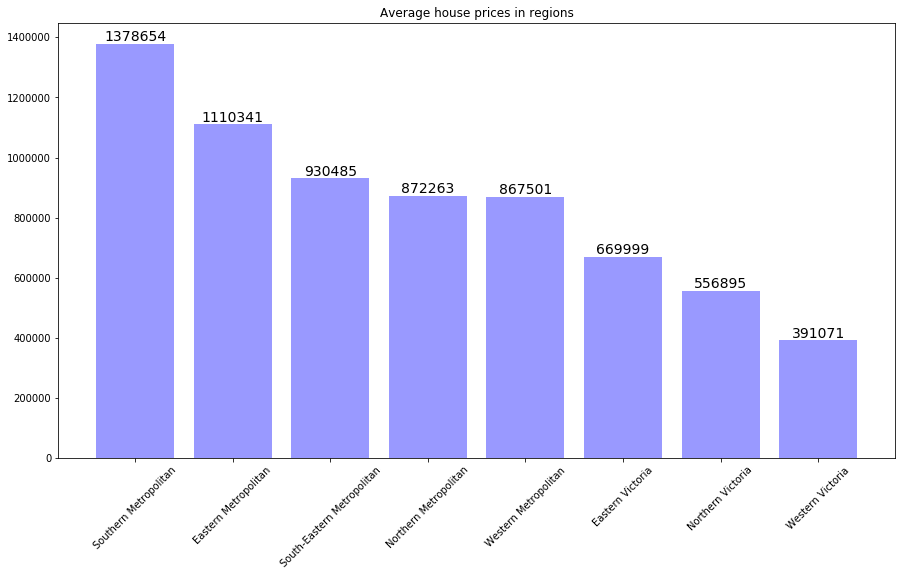

In [73]:
avg_price_bar('Regionname')

In [ ]:
avg_price_bar('Regionname')

             Price
Type              
h     1.273016e+06
t     8.841816e+05
u     5.883745e+05


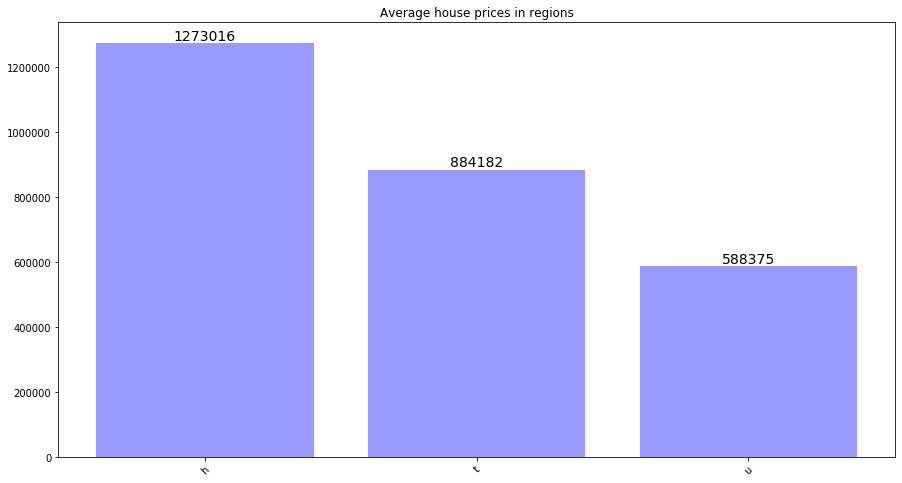

In [74]:
avg_price_bar('Type')

In [98]:
months = df_melb[['Date','Price']].groupby(pd.Grouper(key='Date',freq='M')).mean().sort_values(by='Date', ascending=True)
print(months)

                   Price
Date                    
2016-03-31  1.214349e+06
2016-04-30  1.034289e+06
2016-05-31  1.066096e+06
2016-06-30  1.032916e+06
2016-07-31  9.937646e+05
2016-08-31  1.083825e+06
2016-09-30  1.048672e+06
2016-10-31  1.188132e+06
2016-11-30  1.263208e+06
2016-12-31  1.147341e+06
2017-01-31  8.614342e+05
2017-02-28  1.175492e+06
2017-03-31  1.109566e+06
2017-04-30  1.044364e+06
2017-05-31  1.102508e+06
2017-06-30  1.090207e+06
2017-07-31  8.524998e+05
2017-08-31  9.123487e+05
2017-09-30           NaN
2017-10-31           NaN
2017-11-30  9.338682e+05
2017-12-31  1.183031e+06


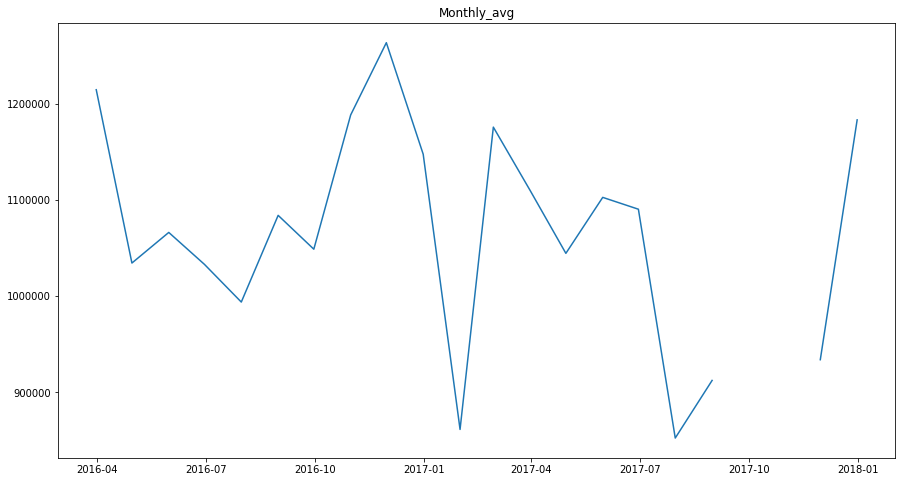

In [100]:
plt.title('Monthly_avg')
plt.plot(months.index, months['Price'])
plt.show()